<a href="https://colab.research.google.com/github/kshimoji8/DeepLearningMugenKnock/blob/master/AI_Workshop_Japan_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI Hands-On Workshop** <br>

Introduction to transfer learning<br>

**Haris Sair, MD**<br>
*Associate Professor of Radiology<br>
Director, Division of Neuroradiology<br>
The Russell H. Morgan Department of Radiology and Radiological Science<br>
Johns Hopkins University School of Medicine*

<small>copyright 2019 Haris Sair</small>


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x

import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

import tensorflow_hub as hub
import tensorflow_datasets as tfds



In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Copy data folder to own Google Drive:
https://drive.google.com/open?id=1jbsbrfuYFZfFw55athSSUv7mzEP1_SrB

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = ('/content/drive/My Drive/classification')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [0]:
base_dir

'/content/drive/My Drive/classification'

In [0]:
train_normal_dir = os.path.join(train_dir, 'normal')  # directory with our training cat pictures
train_stroke_dir = os.path.join(train_dir, 'stroke')  # directory with our training dog pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')  # directory with our validation cat pictures
validation_stroke_dir = os.path.join(validation_dir, 'stroke')  # directory with our validation dog pictures

In [0]:
train_normal_dir

'/content/drive/My Drive/classification/train/normal'

In [0]:
num_normal_tr = len(os.listdir(train_normal_dir))
num_stroke_tr = len(os.listdir(train_stroke_dir))

num_normal_val = len(os.listdir(validation_normal_dir))
num_stroke_val = len(os.listdir(validation_stroke_dir))

total_train = num_normal_tr + num_stroke_tr
total_val = num_normal_val + num_stroke_val

In [0]:
print('total training normal images:', num_normal_tr)
print('total training stroke images:', num_stroke_tr)

print('total validation normal images:', num_normal_val)
print('total validation stroke images:', num_stroke_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training normal images: 6
total training stroke images: 6
total validation normal images: 2
total validation stroke images: 2
--
Total training images: 12
Total validation images: 4


In [0]:
BATCH_SIZE = 1
IMG_SHAPE  = 224

In [0]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 10 images belonging to 2 classes.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 4 images belonging to 2 classes.


In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE,3))

In [0]:
feature_extractor.trainable = False

In [0]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
epochs=10
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/10
12/12 [==============================] - 1s 99ms/step - loss: 0.2284 - accuracy: 0.9167 - val_loss: 0.8459 - val_accuracy: 0.7500
Epoch 2/10
12/12 [==============================] - 1s 84ms/step - loss: 0.2792 - accuracy: 0.9167 - val_loss: 0.9308 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 1s 87ms/step - loss: 0.1703 - accuracy: 0.9167 - val_loss: 0.6541 - val_accuracy: 0.7500
Epoch 4/10
12/12 [==============================] - 1s 83ms/step - loss: 0.2029 - accuracy: 1.0000 - val_loss: 0.7665 - val_accuracy: 0.7500
Epoch 5/10
12/12 [==============================] - 1s 85ms/step - loss: 0.1236 - accuracy: 1.0000 - val_loss: 0.9511 - val_accuracy: 0.7500
Epoch 6/10
12/12 [==============================] - 1s 97ms/step - loss: 0.1162 - accuracy: 1.0000 - val_loss: 0.7000 - val_accuracy: 0.7500
Epoch 7/10
12/12 [==============================] - 1s 84ms/step - loss: 0.0867 - accuracy: 1.0000 - val_loss: 0.7786 - val_accuracy: 0.7500
Epoch 8/10
12

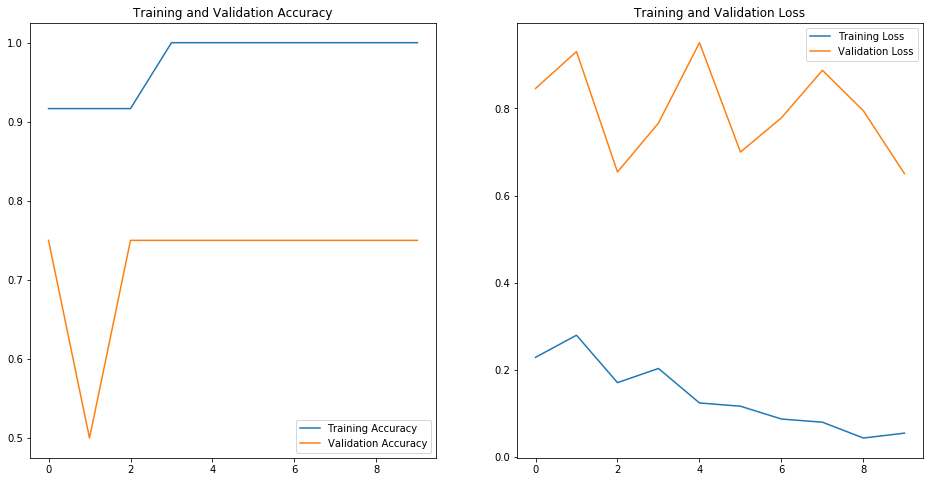

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()